# Исследование рынка недвижимости в Санкт-Петербурге

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
Перед нами стоит задача определить рыночную стоимость объектов недвижимости. Для этого мы проведем исследование и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

## Описание проекта

**Цели:**

- выяснить влияние семейного положение клиента на факт погашения кредита в срок
- выяснить влияние количество детей клиента на факт погашения кредита в срок
- какие факторы больше всего влияют на стоимость квартиры

**Ход исследования**

1. Обзор и предъобработка данных. Проверим данные на ошибки и выбросы. По возможности исправим их.
2. Рассчитаем дополнительные параметры, необходимые для исследования:
    - цены квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры: варианты — первый, последний, другой;
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.

3. Проведем исследовательский анализ зависимости цены квартиры:

    - от площади, числа комнат, удалённости от центра

    - от того, каком этаже расположена квартира: первом, последнем или другом.

    - от даты размещения: дня недели, месяца и года.

## 1. Общая информация и проедъобработка данных

In [1]:
# импортируем библиотеки

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

try:
    import phik
except:
    !pip install phik 
    
import phik
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загружаем данные
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# задаем настройки для отображения таблиц
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных. В таблице 22 столбц:
- `total_images` - число фотаграфий квартиры в объявлении
- `last_price` - цена квартиры на момент снятия объявления
- `total_area` - общая площадь квартиры (м)
- `first_day_exposition` - дата первой публикации объявления
- `rooms` - число комнат
- `ceiling_height` - высота потолков (м)
- `floors_total` - количество этажей в доме
- `living_area` - жилая площадь (м)
- `floor` - этаж
- `locality_name` - название населённого пункта
- `airports_nearest` - расстояние до ближайшего аэропорта (м)
- `cityCenters_nearest` - расстояние до центра город (м)
- `parks_around3000` - количество парков в радиусе 3 км
- `parks_nearest` - расстояние до ближайшего парка (м)
- `ponds_around3000` - количество прудов в радиусе 3 км
- `ponds_nearest` - расстояние до ближайшего пруда
- `days_exposition` - сколько дней было размещено объявление

In [5]:
# изучим первые строки таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# посмотрим число уникальных значений в каждом поле
data.nunique()

total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

In [7]:
# посмотрим сводку статистических данных для каждого числового столбца 

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
# сохраним в переенную размер оригинальный таблицы, что б в дальнейшем посчитать процент потерь данных
original_size = data.shape[0]
original_size

23699

**Вывод**

Исходный данные представляют собой таблицу, содержащую 23 699 строк и 22 столбца. Первичный анализ показывает, что таблица содержит множество пустых значенений, которые в дальнейшем нам предстоит изучить и обработать.

In [9]:
# проверяем наличие дубликатов строк
data.duplicated().sum()

0

In [10]:
#Проверяем наличие пропусков в каждом из столбцов
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- Наблюдаем пропуски в 14 столбцах. Составим промежуточный отчет

In [11]:
for column in data.columns:
    row = len(data.loc[data[column].isna()])
    if row > 0:
        print('- {} - содержит {} пропусков ({:.1%} от общего количества)'.format(column, row, row/data.shape[0]))

- ceiling_height - содержит 9195 пропусков (38.8% от общего количества)
- floors_total - содержит 86 пропусков (0.4% от общего количества)
- living_area - содержит 1903 пропусков (8.0% от общего количества)
- is_apartment - содержит 20924 пропусков (88.3% от общего количества)
- kitchen_area - содержит 2278 пропусков (9.6% от общего количества)
- balcony - содержит 11519 пропусков (48.6% от общего количества)
- locality_name - содержит 49 пропусков (0.2% от общего количества)
- airports_nearest - содержит 5542 пропусков (23.4% от общего количества)
- cityCenters_nearest - содержит 5519 пропусков (23.3% от общего количества)
- parks_around3000 - содержит 5518 пропусков (23.3% от общего количества)
- parks_nearest - содержит 15620 пропусков (65.9% от общего количества)
- ponds_around3000 - содержит 5518 пропусков (23.3% от общего количества)
- ponds_nearest - содержит 14589 пропусков (61.6% от общего количества)
- days_exposition - содержит 3181 пропусков (13.4% от общего количества)


In [12]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

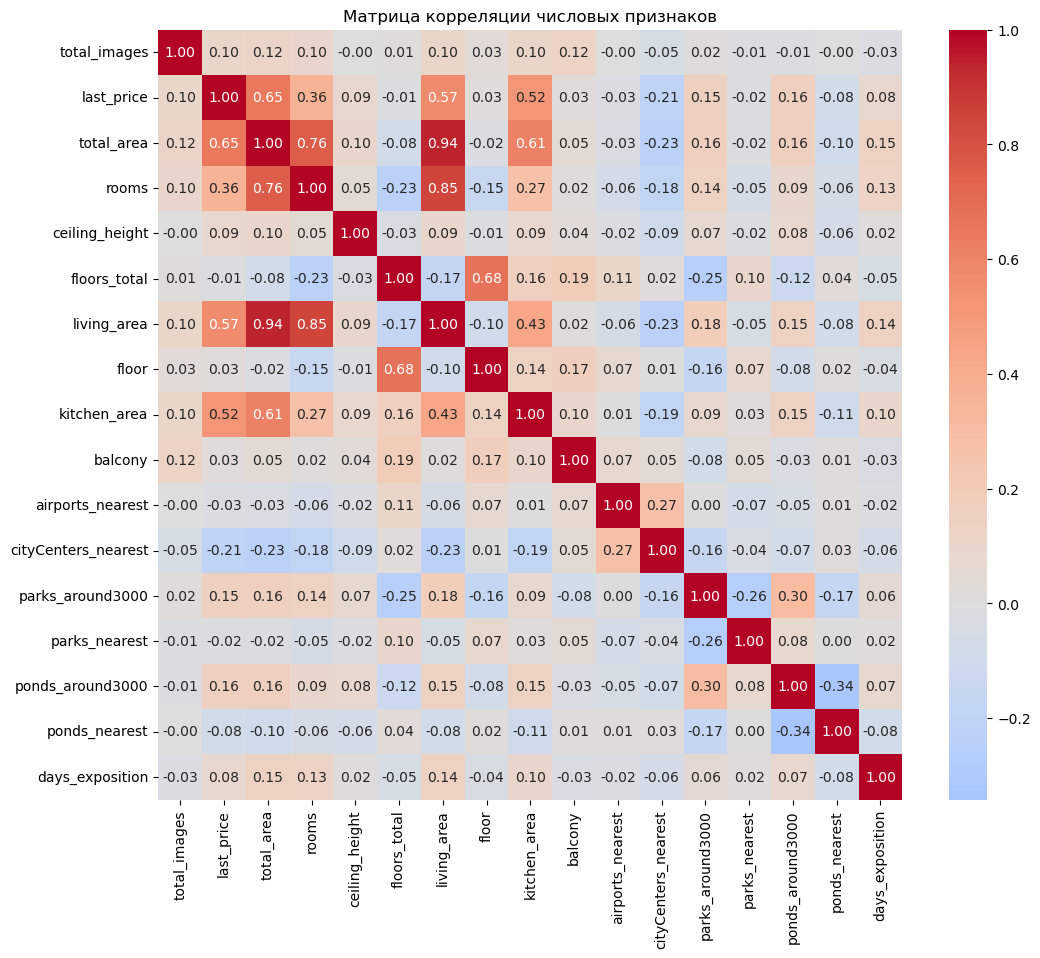

In [13]:
# выберем числовые признаки для построения корреляции
numerical_features = data[['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
                          'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest',
                            'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
                           'ponds_nearest', 'days_exposition']]

# Построение матрицы корреляции
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Матрица корреляции числовых признаков')
plt.show()

**На основании матрицы корреляции заполним пропуски**

- Из таблицы корреляции построенной выше, мы видим, что высота потолков напрямую не зависит ни от одного из показателей. Поэтому пропуски в столбце `ceiling_height` просто заменим медианным значением.

In [14]:
data['ceiling_height'].fillna(value=data['ceiling_height'].median(), inplace=True)

- Считаем, что этажность застройки в деревнях, мелких и крупных городах существенно отличается, поэтому разумно будет  заменить пропуски в столбце `floors_total` медианным значение по каждому населенному пункту. Предварительно удаляем строки с пропусками в столбце `locality_name`, считаем, что данные по населенным пунктам восстановить нет возможности, поэтому лучше сразу от них избавиться.

In [15]:
data = data.dropna(subset=['locality_name'])

In [16]:
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == i), 'floors_total'].median()

- Для замены пропусков в столбце `living_area` проверим зависимость, расчитав корреляцию. 

In [17]:
#расчитаем корреляцию
numerical_features.corr().sort_values(by='living_area')['living_area']

cityCenters_nearest   -0.231368
floors_total          -0.169311
floor                 -0.097210
ponds_nearest         -0.081674
airports_nearest      -0.057912
parks_nearest         -0.050167
balcony                0.018849
ceiling_height         0.090650
total_images           0.104780
days_exposition        0.142454
ponds_around3000       0.148933
parks_around3000       0.184453
kitchen_area           0.428674
last_price             0.566492
rooms                  0.845977
total_area             0.939537
living_area            1.000000
Name: living_area, dtype: float64

- Пропуски в столбце `living_area` заменим средним значением по общей площади помещения из столбца `total_area`, так как видим, что корреляция жилой площади помещения от общей площади составлят 0.94

In [18]:
for i in data['total_area'].unique():
    data.loc[(data['total_area'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == i), 'living_area'].mean()

In [19]:
#смотрим на уникальные значения в столбце аппартаменты
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

- Можем предположить, что если в объявлении явно не указано что это аппартаменты, то значит это обычное жилье. В столбеце `is_apartment` заменим все пропуски на `False`

In [20]:
data['is_apartment'].fillna(False, inplace=True)

- Для замены пропусков в столбце `kitchen_area` проверим зависимость, расчитав корреляцию.

In [21]:
numerical_features.corr().sort_values(by='kitchen_area')['kitchen_area']

cityCenters_nearest   -0.190049
ponds_nearest         -0.105223
airports_nearest       0.008200
parks_nearest          0.029641
parks_around3000       0.087503
ceiling_height         0.087641
balcony                0.098634
days_exposition        0.100586
total_images           0.104756
floor                  0.135531
ponds_around3000       0.150148
floors_total           0.163944
rooms                  0.269945
living_area            0.428674
last_price             0.519869
total_area             0.609121
kitchen_area           1.000000
Name: kitchen_area, dtype: float64

- Площадь кухни зависит от общей площади помещения, их корреляция составляет 0.60. Заменим пропуски мудианным значением в зависимости от общей площади

In [22]:
data['kitchen_area'].fillna(value=data['kitchen_area'].median(), inplace=True)

- Почти в половине данных нет информации о количестве балконов, можем предположить, что владельцы их не указали, так как балконов в этих помещениях нет. Поэтому все пропуски заменим значением `0` 

In [23]:
data['balcony'].fillna(0, inplace=True)

In [24]:
#промежутачная проверка 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area               143
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

- Видим, что в столбце `living_area` остались пропуски. Заменим их средним значением по количеству комнат из столбца `rooms`

In [25]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].mean()
data['rooms'].isna().sum()

0

**Найдем и устраним неявные дубликаты в названиях населённых пунктов.**

In [26]:
data.nunique()

total_images              38
last_price              2964
total_area              2181
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              37
living_area             2237
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             968
balcony                    6
locality_name            364
airports_nearest        8257
cityCenters_nearest     7627
parks_around3000           4
parks_nearest            994
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

In [27]:
#сохраним в отдельную переменную список населенных пунктов для поиска неявных дубликатов
locality_name = data['locality_name']
name_unique = locality_name.sort_values().unique()
name_unique

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [28]:
data['locality_name'] = (
    data['locality_name'].replace(['посёлок станции', 'посёлок при железнодорожной станции',
                                   'поселок', 'городской посёлок', 'посёлок городского типа'], 'посёлок', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
)

In [29]:
data.nunique()

total_images              38
last_price              2964
total_area              2181
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              37
living_area             2237
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             968
balcony                    6
locality_name            335
airports_nearest        8257
cityCenters_nearest     7627
parks_around3000           4
parks_nearest            994
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

- Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставим их как есть.

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Вывод**
- Заменили пропуски по мере возможности. Пропуски в столбцах с картографическими данными оставили как есть.
- Предполагаем, что пропущенные значения в столбце `days_exposition` говорят о там, что объявления по данные объектам недвижимости еще не закрыты, а следовательно возможно еще не проданы. Создадим отдельный столбец с отметкой о закрытии объявления. Посчитаем дни от открытия объявления до сегодняшнего дня и заменим этими данными пропуски

**Изменим типы данных:**

In [31]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Меняем:
- `first_day_exposition` в datetime
- `last_price`, `floors_total` в int
- `balcony` в category 
- заменим тип данных с float64 на float32 для экономии памяти

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [33]:
# создадим словарь для указания новых типов данных
new_dtypes = {
    'last_price': 'int',
    'total_area': 'float32',
    'ceiling_height': 'float32',
    'floors_total': 'int',
    'living_area': 'float32',
    'kitchen_area': 'float32',
    'balcony': 'category',
    'airports_nearest': 'float32',
    'cityCenters_nearest': 'float32',
    'parks_around3000': 'float32',
    'parks_nearest': 'float32',
    'ponds_around3000': 'float32',
    'ponds_nearest': 'float32',
    'days_exposition': 'float32'
}

data = data.astype(new_dtypes)

In [34]:
data.dtypes

total_images                     int64
last_price                       int32
total_area                     float32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float32
floors_total                     int32
living_area                    float32
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                       category
locality_name                   object
airports_nearest               float32
cityCenters_nearest            float32
parks_around3000               float32
parks_nearest                  float32
ponds_around3000               float32
ponds_nearest                  float32
days_exposition                float32
dtype: object

**Вывод:**

- Тип столбца `first_day_exposition` мы поменяли для более корректной работы с датой.
- Столбцы  `last_price`, `floors_total` перевели в числовой тип, что бы могли производить вычисления
- Столбец `balcony` мы перевели в категориальный тип, для экономии памяти при вычислении
- В столбцах с типом float64 заменили тип данных на float32 для экономии памяти.


## 2. Добавляем в таблицу новые столбцы

In [35]:
# добавляем столбец цена одного квадратного метра и округляем до 2 знаков после запятой
data['price_one_square'] = data['last_price'] / data['living_area']
data['price_one_square'] = np.round(data['price_one_square'], decimals=2, out=None)

In [36]:
# добавляем столбец месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [37]:
# добавляем столбец день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
data['day_exposition'] = data['first_day_exposition'].dt.dayofweek

In [38]:
# добавляем столбец год публикации объявления;
data['year_exposition'] = data['first_day_exposition'].dt.year

In [39]:
# добавляем столбец тип этажа квартиры (значения — «первый», «последний», «другой»);
def type_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(type_floor, axis=1)

In [40]:
# добавляем столбец расстояние до центра города в километрах

data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23650 non-null  int64         
 1   last_price              23650 non-null  int32         
 2   total_area              23650 non-null  float32       
 3   first_day_exposition    23650 non-null  datetime64[ns]
 4   rooms                   23650 non-null  int64         
 5   ceiling_height          23650 non-null  float32       
 6   floors_total            23650 non-null  int32         
 7   living_area             23650 non-null  float32       
 8   floor                   23650 non-null  int64         
 9   is_apartment            23650 non-null  bool          
 10  studio                  23650 non-null  bool          
 11  open_plan               23650 non-null  bool          
 12  kitchen_area            23650 non-null  float32    

In [42]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square,month_exposition,day_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.96,3,3,2019,другой,16.0
1,7,3350000,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.52,12,1,2018,первый,19.0
2,10,5196000,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,8,3,2015,другой,14.0
3,0,64900000,159.000000,2015-07-24,3,2.65,14,80.199997,9,False,False,False,9.100000,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,809226.96,7,4,2015,другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.00,6,1,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.809998,2017-03-21,3,3.70,5,73.300003,3,False,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,132332.87,3,1,2017,другой,4.0
23695,14,3100000,59.000000,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,81578.95,1,0,2018,другой,NaN
23696,18,2500000,56.700001,2018-02-11,2,2.65,3,29.700001,1,False,False,False,9.100000,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84175.08,2,6,2018,первый,NaN
23697,13,11475000,76.750000,2017-03-28,2,3.00,17,31.815304,12,False,False,False,23.299999,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,360675.48,3,1,2017,другой,10.0


## 3. Исследовательский анализ данных

In [43]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square,month_exposition,day_exposition,year_exposition,cityCenters_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18139.000000
mean,9.862326,6.541127e+06,60.329071,2017-11-10 00:03:57.463002112,2.070106,2.724311,10.672262,34.476505,5.893277,10.425714,28803.224609,14197.860352,0.611577,490.830719,0.769680,518.059875,180.753204,1.872980e+05,6.401564,2.568710,2017.370021,14.191576
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,3.809400e+02,1.000000,0.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,18.700001,2.000000,7.300000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,1.267857e+05,3.000000,1.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,1.681699e+05,6.000000,3.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.699997,2018-08-27 00:00:00,3.000000,2.700000,16.000000,42.200001,8.000000,11.427500,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,2.207847e+05,10.000000,4.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700012,33.000000,112.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2.166333e+07,12.000000,6.000000,2019.000000,66.000000
std,5.682278,1.089640e+07,35.661705,NaN,1.078620,0.989275,6.585538,21.904058,4.883317,5.628019,12637.320312,8606.828125,0.801973,342.554321,0.937976,277.842102,219.778961,1.848253e+05,3.491418,1.788808,1.037806,8.614518


**Для поиска аномалий построем отдельные гистограммы для таких параметров:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

In [44]:
# прстроим диаграмму размаха для наглядной интерпитации аномальных значений

list_col = ['total_area', 'living_area', 'kitchen_area','last_price', 'rooms',
          'ceiling_height', 'floors_total']

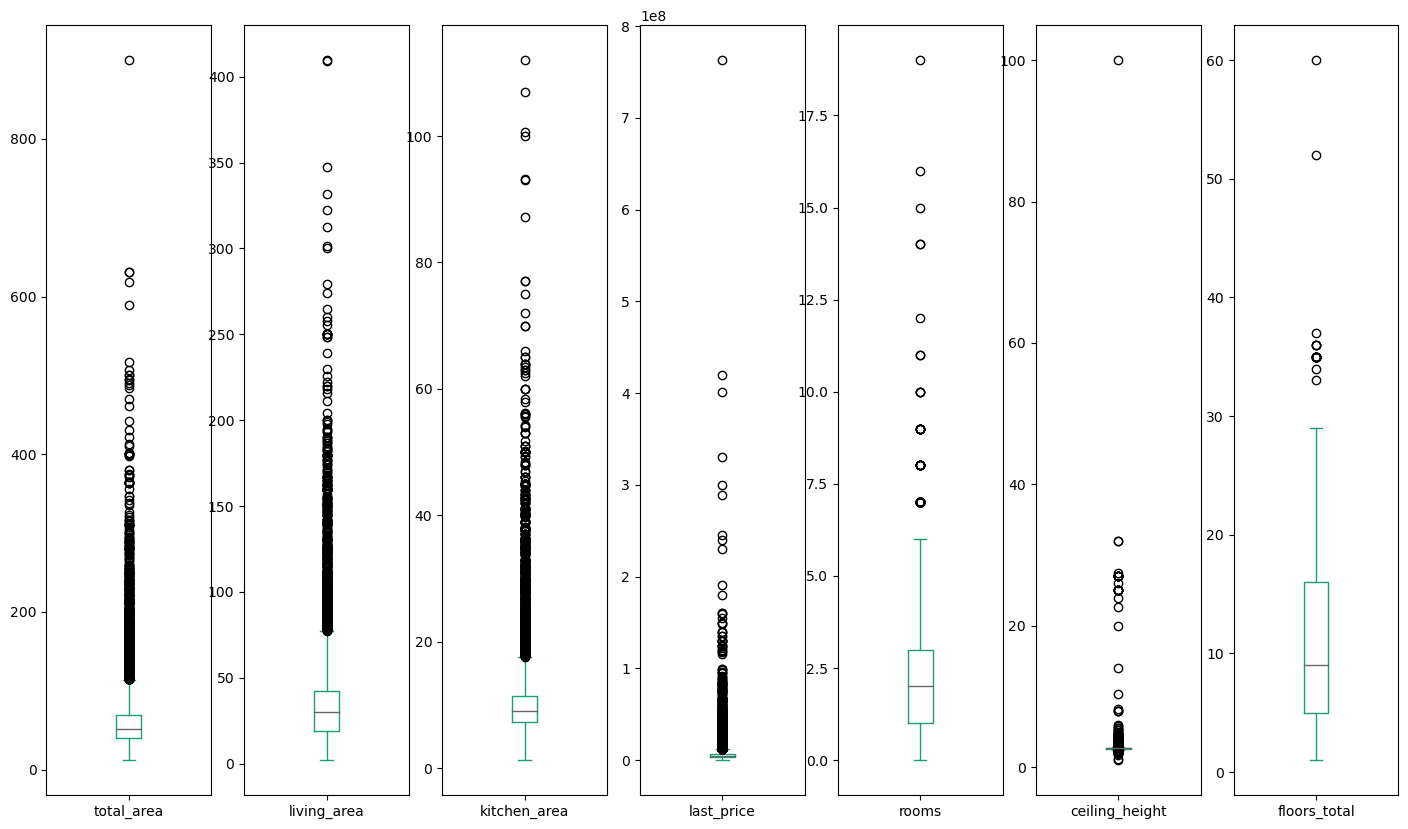

In [45]:
data[list_col].plot(
    kind='box',
    subplots=True,
    layout=(1, 8), 
    sharex=False,
    sharey=False,
    figsize=(20,10),
    colormap="Dark2"
);

Медиана столбца площадь квартиры в квадратных метрах равна: 52.00
Средние значение столбца площадь квартиры в квадратных метрах равна: 60.33


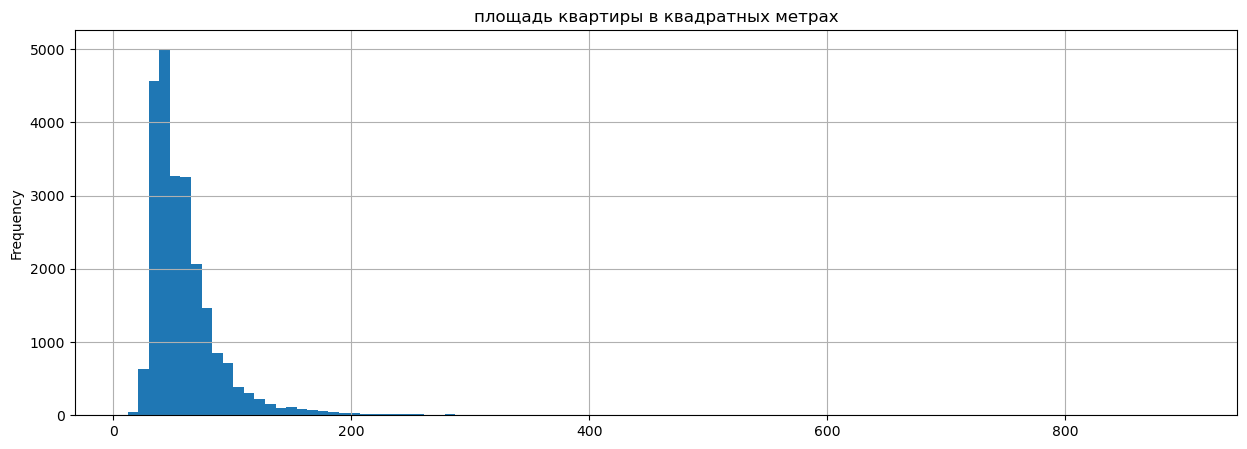

In [46]:
data['total_area'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='площадь квартиры в квадратных метрах')
median = data['total_area'].median()
mean = data['total_area'].mean()
print(f"Медиана столбца площадь квартиры в квадратных метрах равна: {median:.2f}")
print(f"Средние значение столбца площадь квартиры в квадратных метрах равна: {mean:.2f}")

Медиана столбца жилая площадь в квадратных метрах равна: 30.00
Средние значение столбца жилая площадь в квадратных метрах равна: 34.48


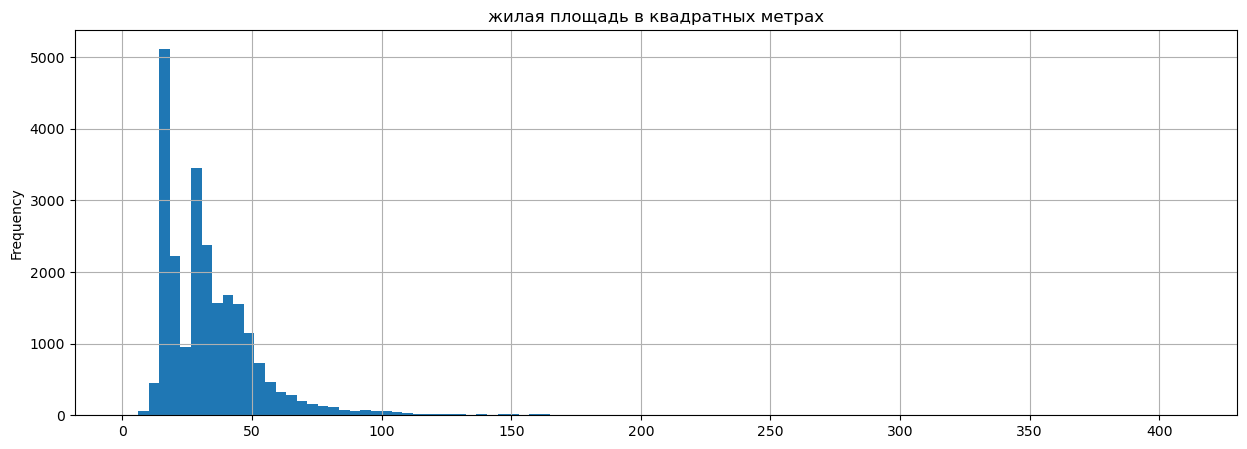

In [47]:
data['living_area'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='жилая площадь в квадратных метрах')
median = data['living_area'].median()
mean = data['living_area'].mean()
print(f"Медиана столбца жилая площадь в квадратных метрах равна: {median:.2f}")
print(f"Средние значение столбца жилая площадь в квадратных метрах равна: {mean:.2f}")

Медиана столбца площадь кухни в квадратных метрах равна: 9.10
Средние значение столбца площадь кухни в квадратных метрах равна: 10.43


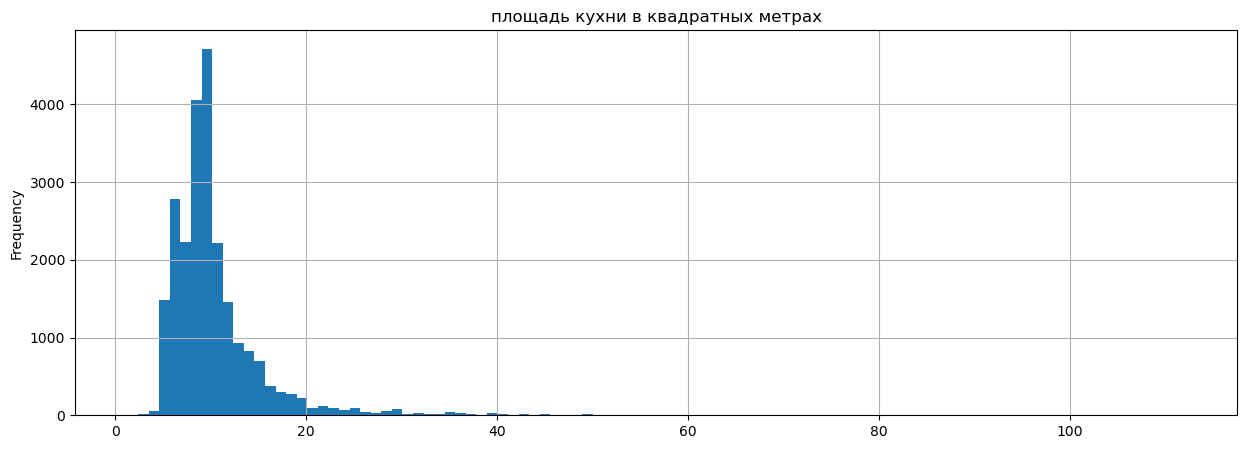

In [48]:
data['kitchen_area'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='площадь кухни в квадратных метрах')
median = data['kitchen_area'].median()
mean = data['kitchen_area'].mean()
print(f"Медиана столбца площадь кухни в квадратных метрах равна: {median:.2f}")
print(f"Средние значение столбца площадь кухни в квадратных метрах равна: {mean:.2f}")

Медиана столбца цена на момент снятия с публикации равна: 4.65
Средние значение столбца цена на момент снятия с публикации равна: 6.54


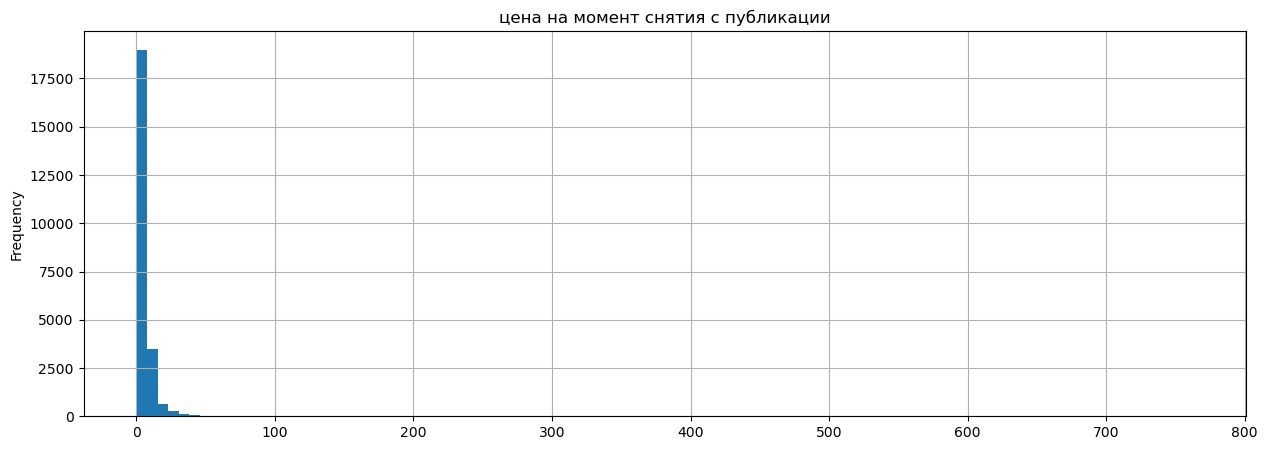

In [49]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='цена на момент снятия с публикации')
median = data['last_price'].median()
mean = data['last_price'].mean()
print(f"Медиана столбца цена на момент снятия с публикации равна: {median:.2f}")
print(f"Средние значение столбца цена на момент снятия с публикации равна: {mean:.2f}")

Медиана столбца количество комнат равна: 2.00
Средние значение столбца количество комнат равна: 2.07


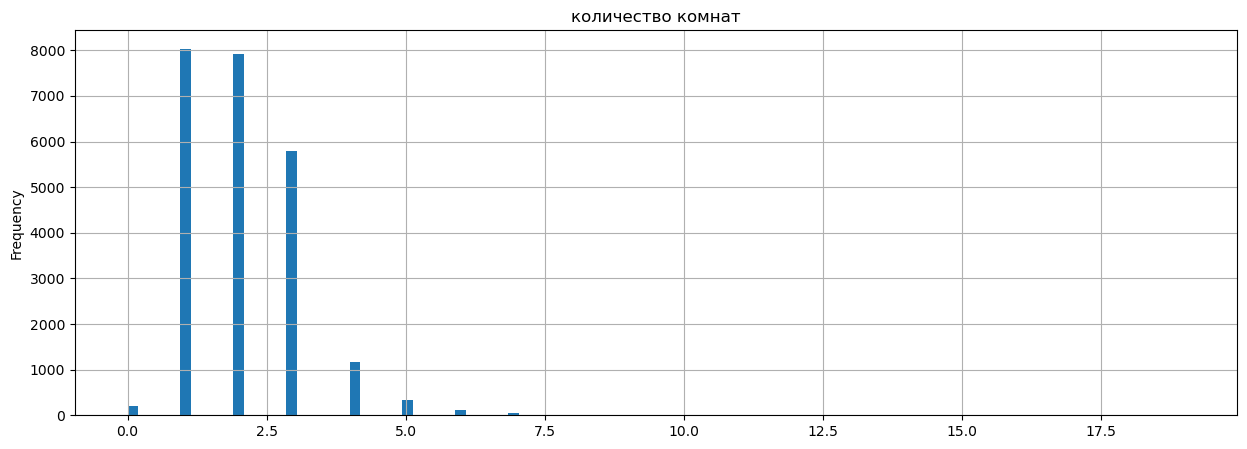

In [50]:
data['rooms'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='количество комнат')
median = data['rooms'].median()
mean = data['rooms'].mean()
print(f"Медиана столбца количество комнат равна: {median:.2f}")
print(f"Средние значение столбца количество комнат равна: {mean:.2f}")

Медиана столбца высота потолков равна: 2.65
Средние значение столбца высота потолков равна: 2.72


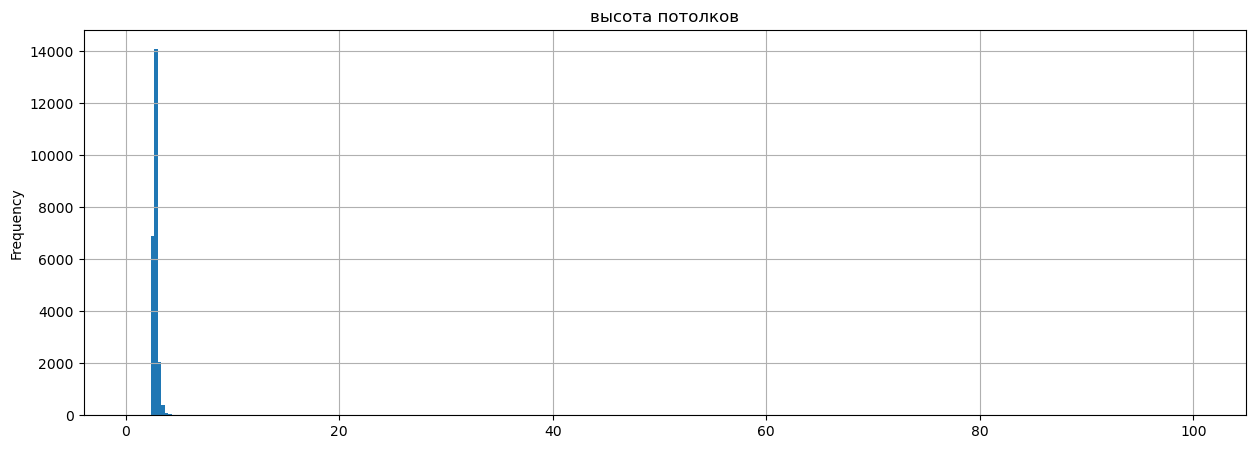

In [51]:
data['ceiling_height'].plot(y=[data],
    kind='hist',
    bins=300, 
    figsize=(15,5), 
    grid=True,
    title='высота потолков')
median = data['ceiling_height'].median()
mean = data['ceiling_height'].mean()
print(f"Медиана столбца высота потолков равна: {median:.2f}")
print(f"Средние значение столбца высота потолков равна: {mean:.2f}")

Медиана столбца общее количество этажей в доме равна: 9.00
Средние значение столбца общее количество этажей в доме равна: 10.67


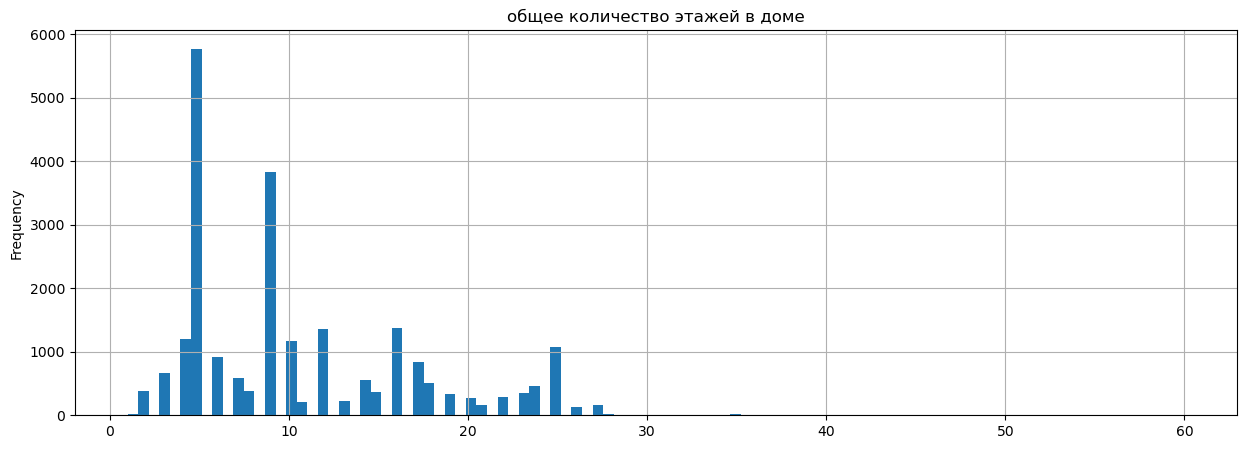

In [52]:
data['floors_total'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='общее количество этажей в доме')
median = data['floors_total'].median()
mean = data['floors_total'].mean()
print(f"Медиана столбца общее количество этажей в доме равна: {median:.2f}")
print(f"Средние значение столбца общее количество этажей в доме равна: {mean:.2f}")

Медиана столбца тип этажа квартиры  равна: 2.00
Средние значение столбца тип этажа квартиры равна: 1.61
0 - первый этаж, 1 - последний этаж, 2 - другой этаж


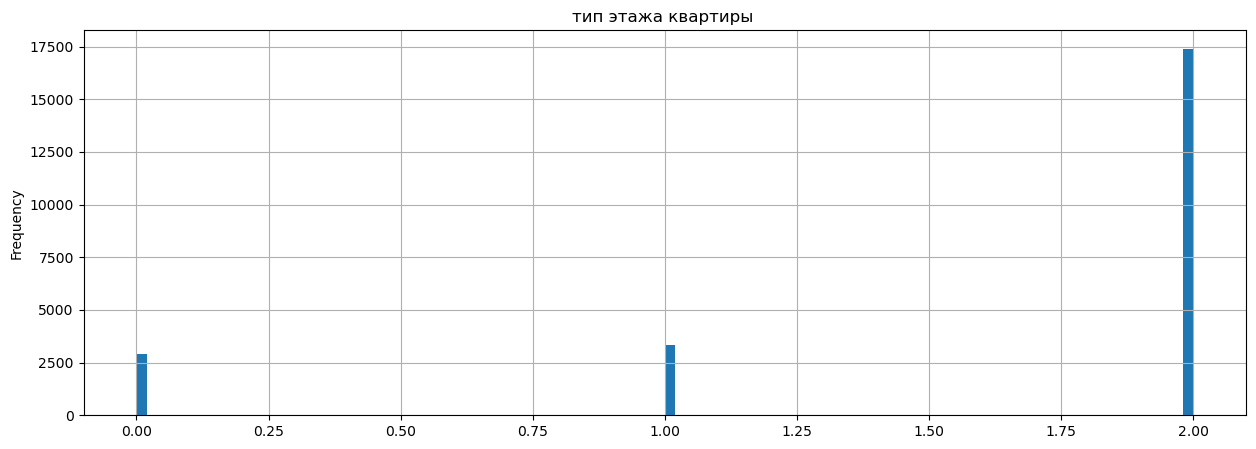

In [53]:
def type_floor_num(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 0
    if floor == floors_total:
        return 1
    else:
        return 2

type_floor = data.apply(type_floor_num, axis=1)

type_floor.plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5),
    grid=True,
    title='тип этажа квартиры ')
median = type_floor.median()
mean = type_floor.mean()
print(f"Медиана столбца тип этажа квартиры  равна: {median:.2f}")
print(f"Средние значение столбца тип этажа квартиры равна: {mean:.2f}")
print("0 - первый этаж, 1 - последний этаж, 2 - другой этаж")

Медиана столбца расстояние до центра города в метрах равна: 13105.00
Средние значение столбца расстояние до центра города в метрах равна: 14197.86
Процент объявление от общего числа: 77%


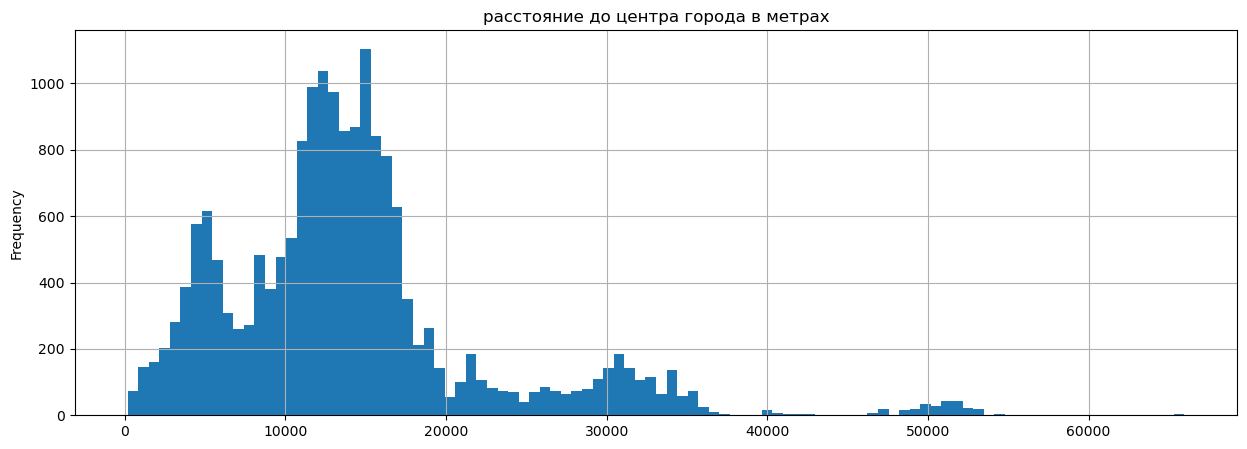

In [54]:
data['cityCenters_nearest'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='расстояние до центра города в метрах')
median = data['cityCenters_nearest'].median()
mean = data['cityCenters_nearest'].mean()
percent_total = data['cityCenters_nearest'].count() / data['locality_name'].count()
print(f"Медиана столбца расстояние до центра города в метрах равна: {median:.2f}")
print(f"Средние значение столбца расстояние до центра города в метрах равна: {mean:.2f}")
print(f'Процент объявление от общего числа: {percent_total:.0%}')

Медиана столбца расстояние до ближайшего парка равна: 454.50
Средние значение столбца расстояние до ближайшего парка равна: 490.83
Процент объявление от общего числа: 34%


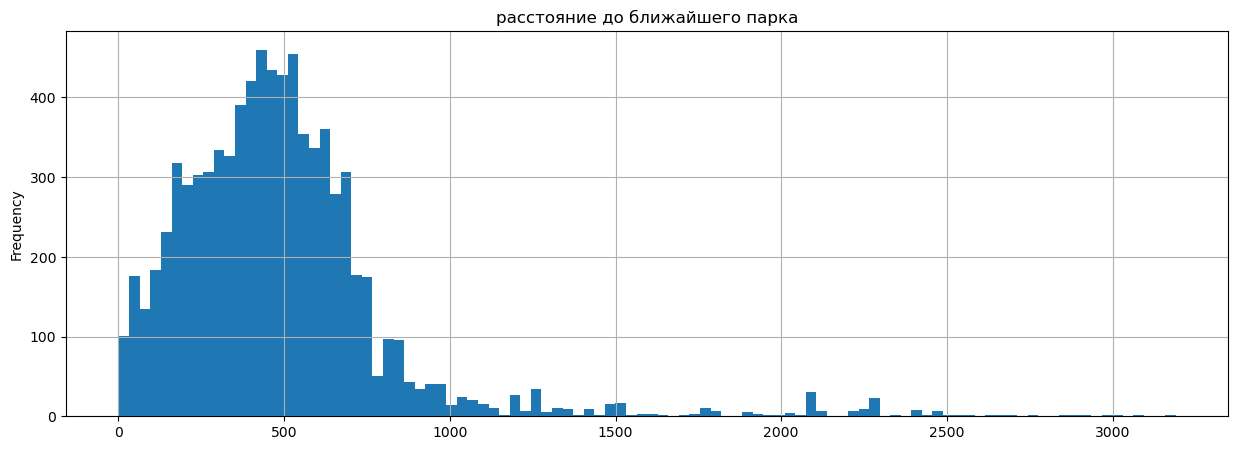

In [55]:
data['parks_nearest'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    title='расстояние до ближайшего парка')
median = data['parks_nearest'].median()
mean = data['parks_nearest'].mean()
percent_total = data['parks_nearest'].count() / data['locality_name'].count()
print(f"Медиана столбца расстояние до ближайшего парка равна: {median:.2f}")
print(f"Средние значение столбца расстояние до ближайшего парка равна: {mean:.2f}")
print(f'Процент объявление от общего числа: {percent_total:.0%}')

**Вывод:**
- по диаграмме размаха можем видеть большое количество аномальных значений, которые хоть и незначительно, но искажают интерпретацию. 
- все графики напоминают собой распределение Пуассона с очень длинными хвостами. Можем предположить, что это так же связано с аномальными значениями 

- Общая площадь в выборке варьируется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Подавляющее большенство квартир с площадью до 100 м2
- Жилая площадь в выборке варьируется от 2 до 409 м2. Среднее значение 30, медиана 34,5 м2.
- Площадь кухни варьируется от 1,3 до 112 м2. Среднее значение 10,4, медиана 9,1 м2.
- Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.
- Количество комнат варьируется от 1 до 19. Больше большая часть квартир одна-, двух- и трехкомантные.
- Высота потолков в среднем составляет 2,77 м, медиана 2,65 м. Минимальная высота 1 метр, максимальная 100м.
- Общее количество этажей варьируется от 1 до 60. Среднее значение - 10 этажей, медианное - 9.
- Расположение квартиры в стреднем находится на 5 этаже, медианное 4 этаж. На первом и последнем этаже находится примерно 25% квартир.
- Гистограмма расстояния до центра построена без учета объектов в которых не указано данное значение. Процент объявлений с указанием расстояния до центра - 79%.  В среднем до центра - 14,4 км, медианное - 13 км. Максимальное расстояние - 66 км. Большее количнство квартир расположено в пределах до 1 до 2 км от центра.
- Процент объявлений с указанием расстояния до ближайшего парка - 75%. Подавляющее большенство квартир расположены в 500м до парка. Среднее значение - 14 448м, медианное - 13 265м

- Во всех данных есть неадекватные значения, наподобе 0 комнат, высоты потолков в 1 или 100 метров, жилой площади всего в 2 м2, а также цена квартиры в 12 190 рублей.
    
- в столбцах `total_area`, `living_area`, `kitchen_area`,`last_price`, `rooms`, `floors_total` все аномальные значения мы удалим
- столбец `ceiling_height` изучим детальней

In [56]:
#функция для подсчета верхнего предела нормального значения
def iqr_max(column):
    Q1 = column.quantile(0.25) 
    Q3 = column.quantile(0.75) 
    IQR = Q3 - Q1
    max_limit = Q3 + 1.5 * IQR
    return max_limit

#функция для подсчета нижнего предела нормального значения
def iqr_min(column):
    Q1 = column.quantile(0.25) 
    Q3 = column.quantile(0.75) 
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    return min_limit

In [57]:
# Удаляем аномальные значения в столбцах 'total_area', 'living_area', 'kitchen_area','last_price', 'rooms', 'floors_total
max_limit_total_area = iqr_max(data['total_area'])
data = data[data['total_area'] < max_limit_total_area]

max_limit_living_area = iqr_max(data['living_area'])
data = data[data['living_area'] < max_limit_living_area]

max_limit_kitchen_area = iqr_max(data['kitchen_area'])
data = data[data['kitchen_area'] < max_limit_kitchen_area]

max_limit_last_price = iqr_max(data['last_price'])
data = data[data['last_price'] < max_limit_last_price]

max_limit_rooms = iqr_max(data['rooms'])
data = data[data['rooms'] < max_limit_rooms]

max_limit_floors_total = iqr_max(data['floors_total'])
data = data[data['floors_total'] < max_limit_floors_total]

In [58]:
# Посмотрим какие есть уникальные значения в столбце ceiling_height
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,
        2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,
        2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,
        2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,
        2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,
        2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,
        2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.27,  3.28,  3.3 ,
        3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.4 ,
        3.42,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.54,
        3.55,  3.56,  3.57,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.67,
        3.7 ,  3.75,  3.78,  3.8 ,  3.83,  3.85,  3.88,  3.9 ,  3.95,
        3.98,  4.  ,

- Значения меньше 2 можем удалить, тут явная ошибка. Значени больше 20, можем предположить что записаны с ошибкой, перенесем десятичную точку на одно значение влево. Остальные значения от 8 и выше удалим. Сделаем это в отдельной переменной 

In [59]:
old_value = [20.  , 22.6 , 24.  , 25.  , 26.  , 27.  , 27.5 , 32.  ]
new_value = [2.0, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2]

data['ceiling_height'] = (
    data['ceiling_height']
    .apply(lambda x: new_value[old_value.index(x)] if x in old_value else x)
)
data = data.query('2 < ceiling_height < 8')

In [60]:
print(f'Размер таблицы был: {original_size}')
print(f'Размер таблицы стал: {data.shape[0]}')
print(f'Проценты от исходных данных: {(data.shape[0]/original_size):.0%}')

Размер таблицы был: 23699
Размер таблицы стал: 20106
Проценты от исходных данных: 85%


**Изучим, как быстро продавались квартиры (столбец days_exposition)**

In [61]:
data['days_exposition'].describe()

count    17719.000000
mean       168.852020
std        206.172836
min          1.000000
25%         43.000000
50%         89.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

days_exposition    Axes(0.125,0.11;0.775x0.77)
dtype: object

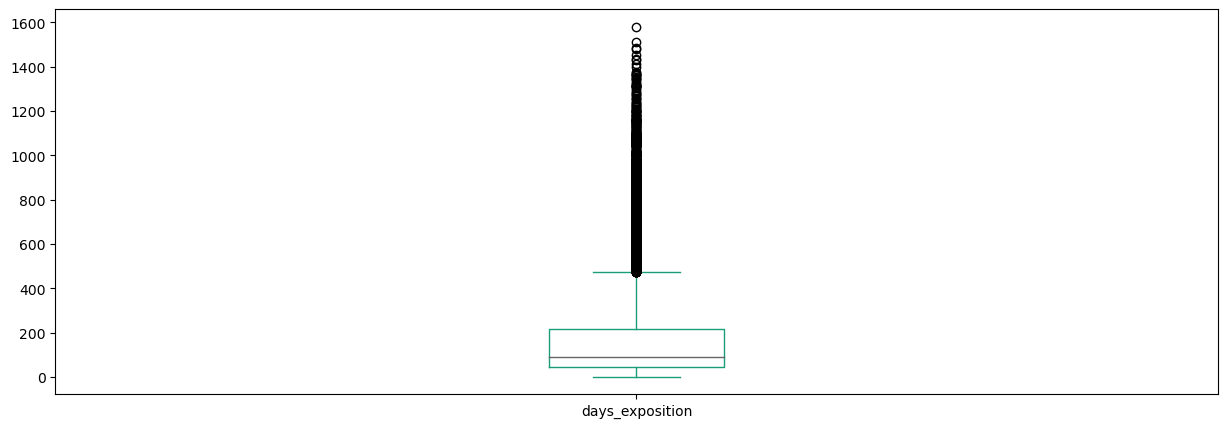

In [62]:
data['days_exposition'].plot(
    kind='box',
    subplots=True, 
    sharex=False,
    sharey=False,
    figsize=(15,5),
    colormap="Dark2"
)

In [63]:
# посмотрим на верхнюю границу нормального значения
iqr_max(data['days_exposition'])

473.0

Медиана столбца количество дней до снятия объявления с продажи равна: 89.00
Средние значение столбца количество дней до снятия объявления с продажи равна: 168.85


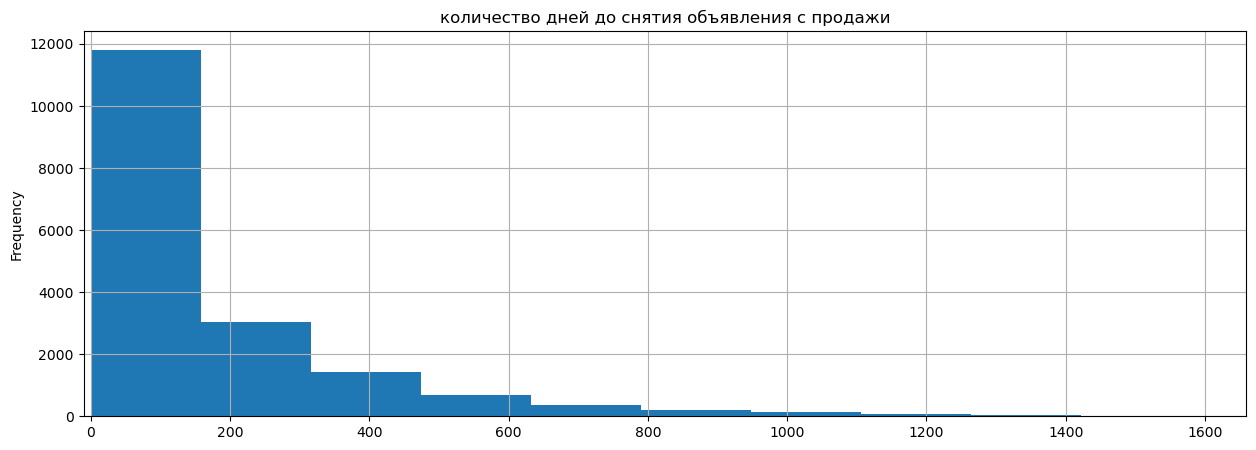

In [64]:
data['days_exposition'].plot(y=[data],
    kind='hist',
    bins=10, 
    figsize=(15,5), 
    grid=True,
    xlim=(-10),
    title='количество дней до снятия объявления с продажи')
median = data['days_exposition'].median()
mean = data['days_exposition'].mean()
print("Медиана столбца количество дней до снятия объявления с продажи равна: {:.2f}".format(median))
print("Средние значение столбца количество дней до снятия объявления с продажи равна: {:.2f}".format(mean))

<Axes: title={'center': 'количество дней до снятия объявления с продажи'}, ylabel='Frequency'>

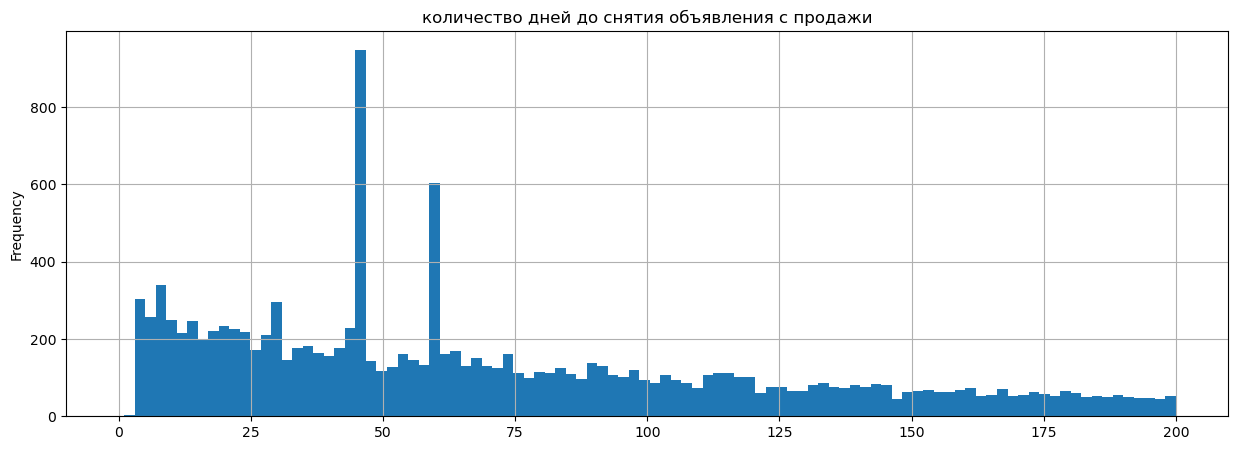

In [65]:
data['days_exposition'].plot(y=[data],
    kind='hist',
    bins=100, 
    figsize=(15,5), 
    grid=True,
    xlim=(-10),
    range = (1,200),
    title='количество дней до снятия объявления с продажи')

In [66]:
data['days_exposition'].value_counts().sort_values(ascending=False).head(20)

days_exposition
45.0    865
60.0    506
7.0     215
30.0    188
4.0     156
3.0     147
5.0     139
14.0    133
44.0    129
9.0     129
8.0     125
20.0    123
10.0    121
11.0    120
6.0     117
18.0    116
13.0    114
21.0    113
28.0    113
22.0    112
Name: count, dtype: int64

**Вывод:**
   - На диаграмме размаха видим большое количество выбивающихся значений. Верхний предел нормального значения равен 473 дням, можем считать, что все объявления которые выше являются необычно долгими.
   - Среднее значение - 168 дней, а медиана - 89 дней.  
   - Cудя по гистограмме - мы имеем распределение Пуассона, и видим, что больше половины объявлений были сняты до 200 дней. 
   - Сделав гистограмму со значениями от 0 до 200, обнаружили выбивающиеся значения на 45 и 60 днях. Сервис автоматически удаляет сообьщения на 45 и 60 дни.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Верно! Это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

**Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта**

In [67]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square,month_exposition,day_exposition,year_exposition,type_floor,cityCenters_nearest_km
1,7,3.350,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.52,12,1,2018,первый,19.0
2,10,5.196,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.88,8,3,2015,другой,14.0
5,10,2.890,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.10,0.0,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,200694.45,9,0,2018,другой,NaN
6,6,3.700,37.299999,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,349056.59,11,3,2017,другой,19.0
8,20,2.900,33.160000,2018-05-23,1,2.65,27,15.430000,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,187945.56,5,2,2018,другой,NaN


In [68]:
correlation_matrix.corr().sort_values(by='last_price', ascending=False)['last_price']

last_price             1.000000
total_area             0.887417
living_area            0.836929
kitchen_area           0.817637
rooms                  0.726861
parks_around3000       0.339209
ponds_around3000       0.296517
days_exposition        0.146524
total_images           0.103447
ceiling_height         0.100371
balcony               -0.172531
parks_nearest         -0.196881
floor                 -0.250677
floors_total          -0.302012
ponds_nearest         -0.333924
airports_nearest      -0.334571
cityCenters_nearest   -0.611013
Name: last_price, dtype: float64

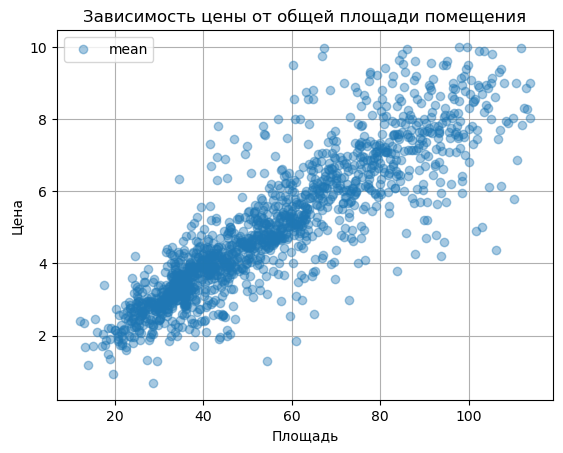

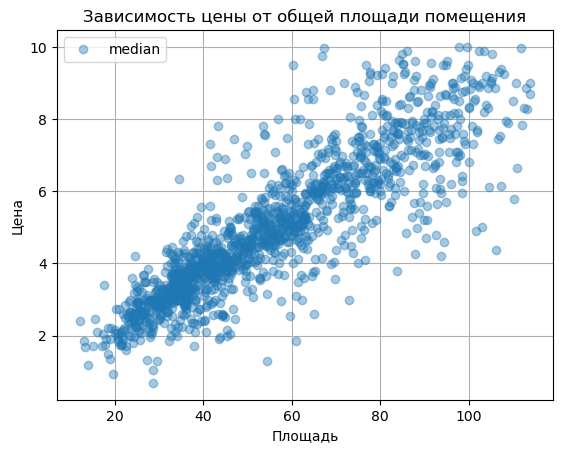

In [69]:
#графики зависимости цены от общей площади помещения

pivot_by_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'median'])
pivot_by_total_area.columns = ['mean', 'median']
pivot_by_total_area.plot(y='mean', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от общей площади помещения')
plt.ylabel('Цена')
plt.xlabel('Площадь')
pivot_by_total_area.plot(y='median', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от общей площади помещения')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show() 

**Вывод**

- Коэффициент корреляции зависимости цены от площади помещения равен 0,88, соответственно некая зависимость все таки присутствует, что подтверждается линейной связью на диаграмах. Чем выше площадь, тем выше стоимость.

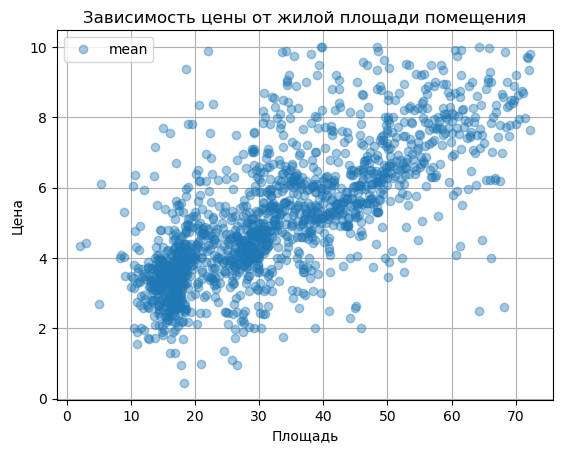

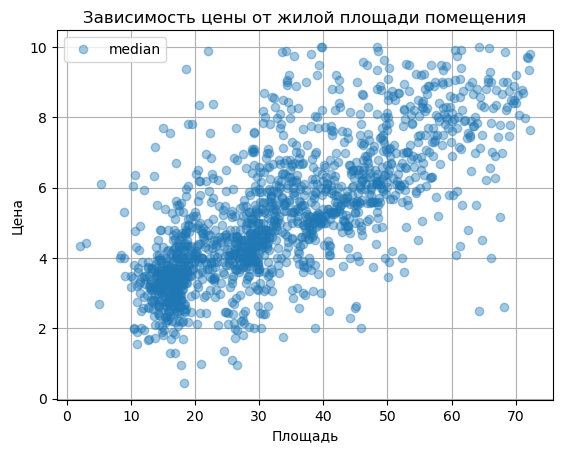

In [70]:
#графики зависимости цены от жилой площади помещения

pivot_by_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc=['mean', 'median'])
pivot_by_living_area.columns = ['mean', 'median']
pivot_by_living_area.plot(y='mean', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от жилой площади помещения')
plt.ylabel('Цена')
plt.xlabel('Площадь')
pivot_by_living_area.plot(y='median', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от жилой площади помещения')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show() 

**Вывод**

- Коэффициент корреляции зависимости цены от жилой площади помещения несколько ниже и равен 0,83, зависимость так же присутствует, хоть и менее выраженная на диаграмах. Можем проследить хоть и рассеянное, но увеличение стоимости в зависимости от жилой площади помещения.

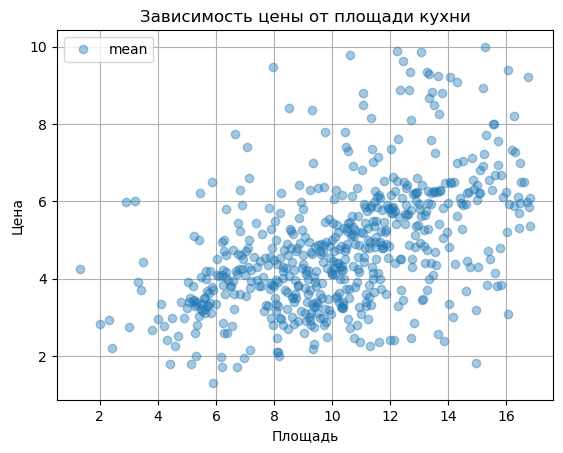

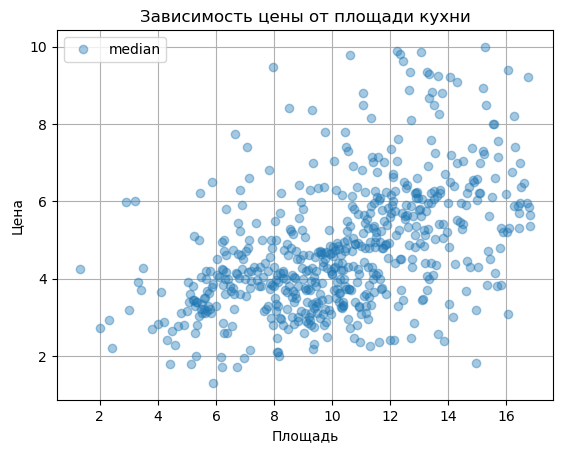

In [71]:
#графики зависимости цены от площади кухни

pivot_by_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean', 'median'])
pivot_by_kitchen_area.columns = ['mean', 'median']
pivot_by_kitchen_area.plot(y='mean', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Цена')
plt.xlabel('Площадь')
pivot_by_kitchen_area.plot(y='median', alpha=0.4, style = 'o', grid=True)
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show() 

**Вывод**

- Коэффициент корреляции зависимости цены от площади кухни еще ниже и равен 0,81. На диаграммах зависимость не отслеживается. Наблюдаем практически равномерное распределения цены, при площади кухни от 8 до 17 м2.

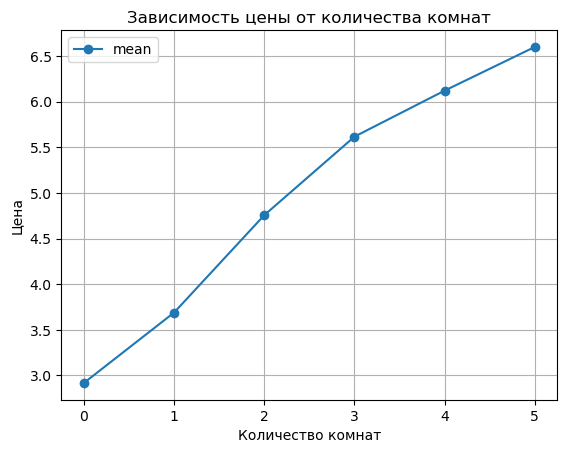

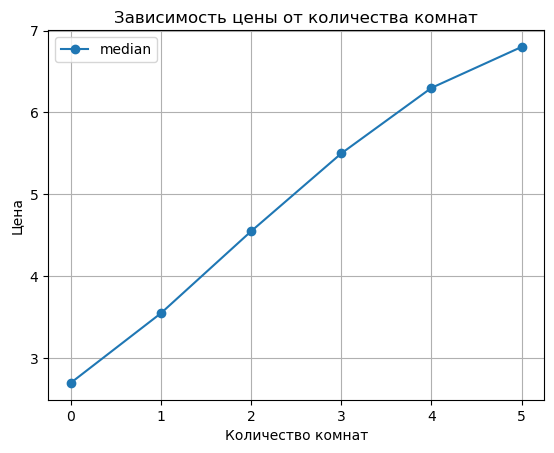

In [72]:
#графики зависимости цены от количества комнат

pivot_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median'])
pivot_by_rooms.columns = ['mean', 'median']
pivot_by_rooms.plot(y='mean', style = 'o-', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
pivot_by_rooms.plot(y='median', style = 'o-', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.show() 

**Вывод**


- Коэффициент корреляции зависимости цены от количества комнат равен 0,72. На диаграммах наблюдаем линейную зависимость, с увеличением количества комнат, равномерно увеличивается и цена.

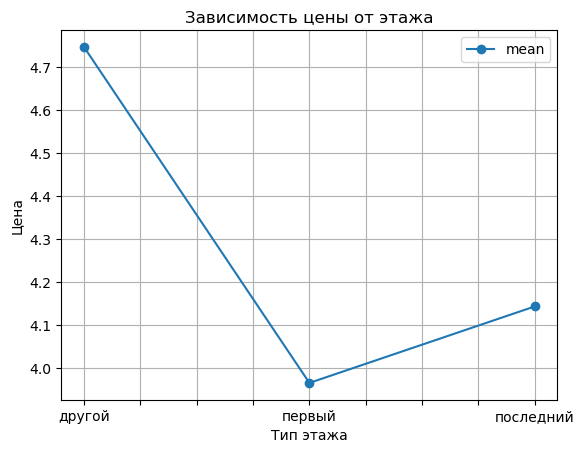

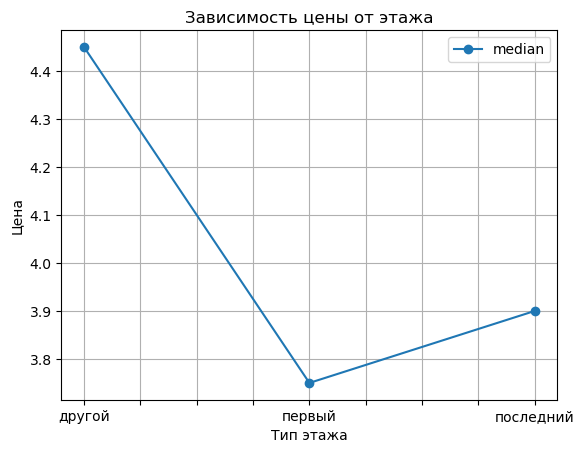

In [73]:
#графики зависимости цены от этажа квартиры

pivot_by_floor = data.pivot_table(index='type_floor', values='last_price', aggfunc=['mean', 'median'])
pivot_by_floor.columns = ['mean', 'median']
pivot_by_floor.plot(y='mean', style = 'o-', grid=True)
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
pivot_by_floor.plot(y='median', style = 'o-', grid=True)
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show() 

**Вывод**


- Первый и последний этаж ценятся горазда ниже нежели остальные.

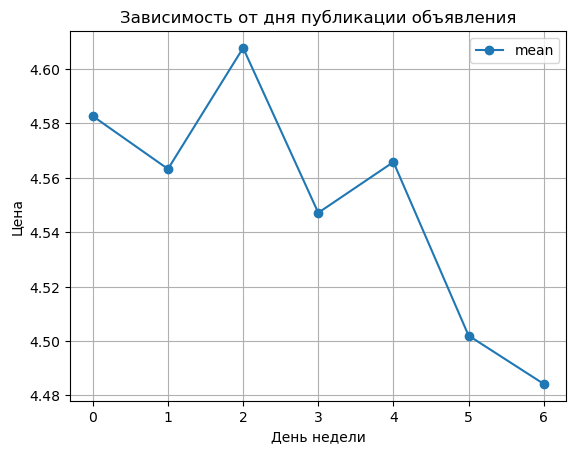

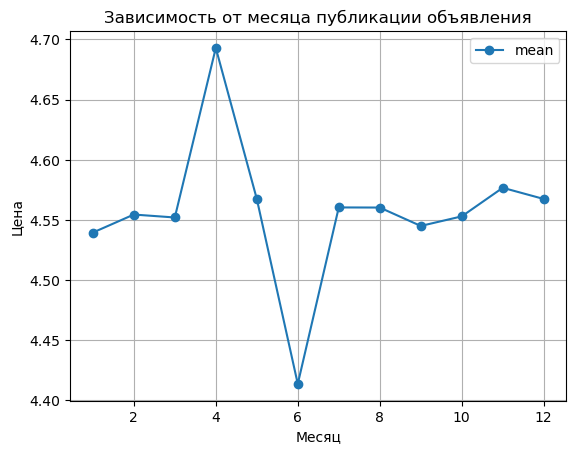

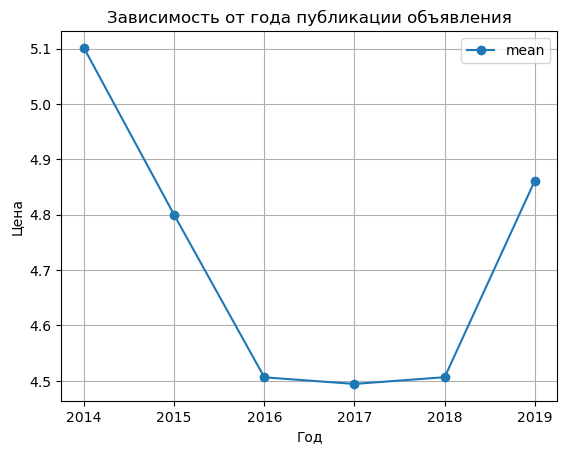

In [74]:
#графики зависимости цены от дня публикации объявления
pivot_by_day = data.pivot_table(index='day_exposition', values='last_price', aggfunc=['mean'])
pivot_by_day.columns = ['mean']
pivot_by_day.plot(y='mean', style = 'o-', grid=True)
plt.title('Зависимость от дня публикации объявления')
plt.ylabel('Цена')
plt.xlabel('День недели')

#графики зависимости цены от месяца публикации объявления
pivot_by_month = data.pivot_table(index= 'month_exposition', values='last_price', aggfunc=['mean'])
pivot_by_month.columns = ['mean']
pivot_by_month.plot(y='mean', style = 'o-', grid=True)
plt.title('Зависимость от месяца публикации объявления')
plt.ylabel('Цена')
plt.xlabel('Месяц')

#графики зависимости цены от года публикации объявления
pivot_by_year = data.pivot_table(index= 'year_exposition', values='last_price', aggfunc=['mean'])
pivot_by_year.columns = ['mean']
pivot_by_year.plot(y='mean', style = 'o-', grid=True)
plt.title('Зависимость от года публикации объявления')
plt.ylabel('Цена')
plt.xlabel('Год')

plt.show() 

**Вывод**


- Как бы странно не казалось, но день недели имеет значение. Объявления выложенные в выходные дни (суббота и воскресение) цена квартиры наименьшая. Найвысшая цена в среду. Остальные дни относительно равномерно распределены.
- Месяц так же имеет значение. В апреле цена найвысшая, а в июне наименьшая. Весной рынок оживает после зимней спячки, а летом пора отпусков, цена падает. Остальные месяца плюс минус равны.
- В 2014 году произошел мировой кризис, была поднята ключевая ставка до 17%, что повлекло к значительному подорожанию недвижимости, но вдальнейшем, 2015 и 2016 год цена планомерно снижалась, после чего оставалсь на одном уровне до 2019 года, когда в стране опять начался кризис.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [75]:
pivot_top_name = data.pivot_table(index = 'locality_name', values = 'price_one_square', aggfunc=['count', 'mean'])
pivot_top_name.columns = ['count', 'mean']
pivot_top_name = pivot_top_name.sort_values(by='count', ascending=False).head(10)
pivot_top_name


,count,mean
locality_name,,
Санкт-Петербург,12549,192071.316872
посёлок Мурино,539,172541.101150
посёлок Шушары,428,153736.809579
Всеволожск,380,127075.428526
Колпино,325,130696.089631
Пушкин,315,180619.261143
посёлок Парголово,313,198357.275687
Гатчина,299,121020.295786
деревня Кудрово,275,180979.104436


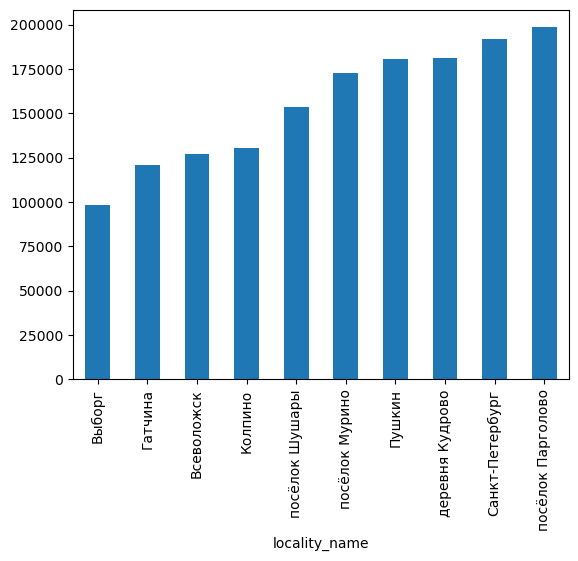

In [76]:
pivot_top_name_sorted = pivot_top_name['mean'].sort_values()
pivot_top_name_sorted.plot(kind='bar')
plt.show()

In [77]:
#самая низкая стоимость одного квадратного метра
pivot_top_name[pivot_top_name['mean'] == pivot_top_name['mean'].min()]

,count,mean
locality_name,,
Выборг,219,98584.703242


In [78]:
#самая высокая стоимость одного квадратного метра
pivot_top_name[pivot_top_name['mean'] == pivot_top_name['mean'].max()]

,count,mean
locality_name,,
посёлок Парголово,313,198357.275687


**Вывод:**

- Cамая высокая стоимость жилья из топ 10 населённых пунктов с самым большим количеством объявлений в поселке Парголово,  самая низкая стоимость в Выборге.

**Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:**

- учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
- описано, как стоимость объекта зависит от расстояния до центра города;
- построен график изменения средней цены для каждого километра от центра Петербурга.

Text(0.5, 0, 'Расстояние')

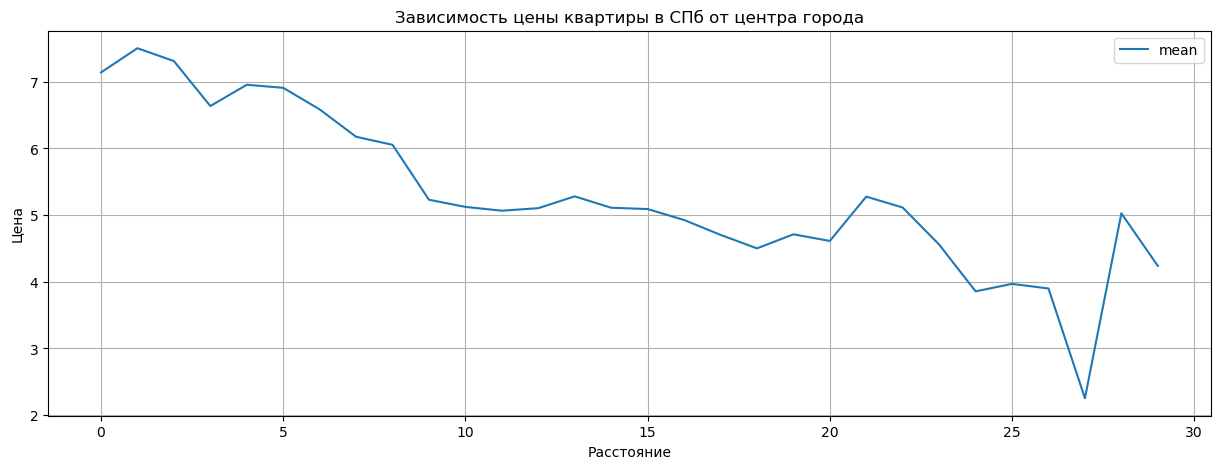

In [79]:
data_SPb = data.query('locality_name == "Санкт-Петербург"')
data_SPb['cityCenters_nearest_km'] = data_SPb['cityCenters_nearest_km'].fillna(value = data['cityCenters_nearest_km'])

pivot_by_SPb = data_SPb.pivot_table(index='cityCenters_nearest_km', values = 'last_price')
pivot_by_SPb.columns = ['mean']
pivot_by_SPb.plot(y='mean', style = '-', grid=True, figsize=(15,5))
plt.title('Зависимость цены квартиры в СПб от центра города')
plt.ylabel('Цена')
plt.xlabel('Расстояние')

In [80]:
pivot_by_SPb

,mean
cityCenters_nearest_km,
0.0,7.141429
1.0,7.504971
2.0,7.312450
3.0,6.637068
4.0,6.956294
5.0,6.910313
6.0,6.586382
7.0,6.175582
8.0,6.054610


**Вывод:**

- Как можем наблюдать на графике, максимальная цена на квартиры в радиусе 2х километров от центра. Дальше цена планомерно снижается.

## 4. Вывод

В ходе проведенного исследования, мы обработали полученные данных:
- обработали пропущенные значения, где это было возможно;
- заменили типы данных на необходимые для удобной работы;
- рассчитали и добавили в таблицу цену за один квадратный метр;
- получили из даты публикации дни недели, месяцы и года размещения объявлений;
- добавили категории по этажам квартир.
    
Изучили следующие параметры на наличие не стандартных значений:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.
Были определены аномалии в части данных параметров. Обработали и избавились от них.
    
Изучая время продажи квартир мы выявили, что среднее значение закрытия объявления составляет - 168 дней, а медианное - 89 дней. При помощи диаграммы размаха мы выявили, что нормальные значения продажи квартир варьируются от 1 до 200 дней.

Выявили, что на полную стоимость квартиры влияет:
- в первую очередь общая площадь помещения, количество комнат и близость к центру города;
- квартиры на первом и последнем этажаж пользуются меньшим спросом и соответственно цена заметно ниже;
- в какой то мере, на стоимость влияют день, месяц и год размещения. Наименьшая цена была в объявлениях которые опубликованы в выходные. Найвысшая цена в среду. В апреле цена найвысшая, а в июне наименьшая. Остальные месяца плюс минус равны. В годовом разрезе, цена напрямую зависит от экономического настроения в стране и мире. Во время общемировых кризисов цена заметно увеличивается.
    
Выделили топ 10 городов с самой высокой стоимостью за квадратный метр. К нашему удивлению, максимальная стоимость одного метра в поселке Парголово (198т./м2), а не в Санкт-Петербурге (192т./м2), что было бы логично.
    
Отдельно изучили изменение стоимости квартиры в Санкт-Петербурге, в зависимости от расстаяния до центра города. В радиусе 2-х километров цена найвысшая. Дальше, цена равномерно уменьшается.